In [1]:
import basedosdados as bd
import matplotlib as plt

# Queries

# Evolução do ideb no Brasil ano a ano
ideb_ano_brasil = '''
SELECT ano, avg(ideb) as ideb_medio_brasil
FROM `basedosdados.br_inep_ideb.brasil`
GROUP BY ano
'''

# Evolução do ideb no Brasil ano a ano, comparando a rede pública com a privada
ideb_ano_rede = '''
SELECT ano, rede, avg(ideb) as ideb_medio
FROM `basedosdados.br_inep_ideb.brasil`
GROUP BY ano, rede
HAVING rede = 'publica' or rede = 'privada'
'''

# Evolução do ideb por região
ideb_ano_regiao = '''
SELECT ano, regiao, avg(ideb) as ideb_medio
FROM `basedosdados.br_inep_ideb.regiao`
GROUP BY ano, regiao
'''

In [2]:
# Baixando os dados da basedosdados com as queries especificadas
evolucao_brasilDf = bd.read_sql(ideb_ano_brasil, billing_project_id="ps-analytica-a2-416401")

Downloading: 100%|██████████████████████████████| 9/9 [00:00<00:00, 24.73rows/s]


In [3]:
publico_privada_brasilDf = bd.read_sql(ideb_ano_rede, billing_project_id="ps-analytica-a2-416401")

Downloading: 100%|████████████████████████████| 18/18 [00:00<00:00, 53.27rows/s]


In [4]:
evolucao_regiaoDf = bd.read_sql(ideb_ano_regiao, billing_project_id="ps-analytica-a2-416401")

Downloading: 100%|███████████████████████████| 45/45 [00:00<00:00, 132.99rows/s]


In [5]:
# Reindexando a relação de idebs de escolas públicas/privadas para ter uma linha para cada ano,
# com o ideb médio de cada rede nesse ano, melhorando a visualização
publico_privada_brasilDf = publico_privada_brasilDf.pivot(index='ano', columns='rede', values='ideb_medio')

<Axes: xlabel='ano', ylabel='Ideb médio'>

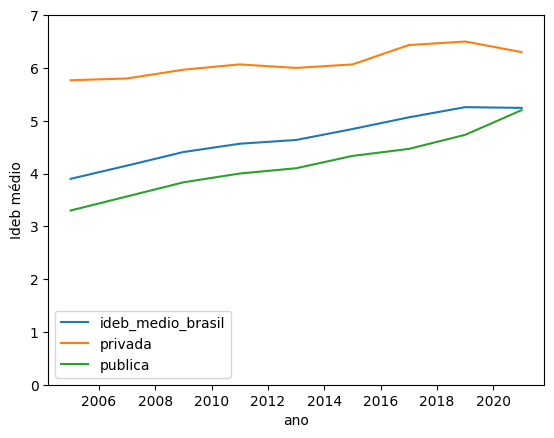

In [36]:
# Unindo os dataframes para comparar a média 
evolucao_brasilDf.merge(publico_privada_brasilDf, left_on='ano', right_on='ano').plot(x='ano', ylim=(0, 7), ylabel='Ideb médio')

In [9]:
evolucao_regiaoDf = evolucao_regiaoDf.pivot(index='ano', columns='regiao', values='ideb_medio')

<Axes: xlabel='Ano', ylabel='Ideb Médio'>

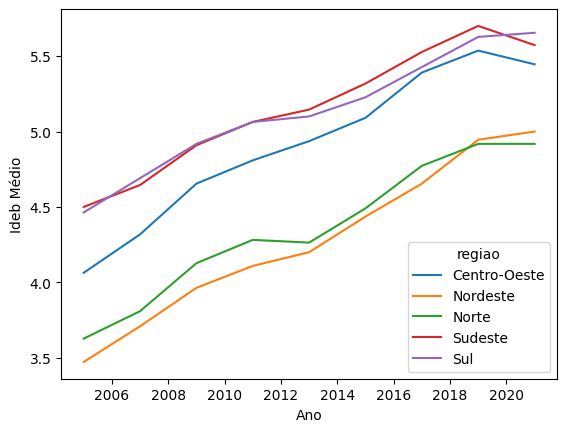

In [35]:
evolucao_regiaoDf.plot(ylabel='Ideb Médio', xlabel='Ano')